In [1]:
import pandas as pd

In [10]:
df1 = pd.read_csv('smoothed_raceline.csv')
df2 = pd.read_csv('velocities.csv')
df3 = pd.concat([df1, df2], axis=1, ignore_index=False)

df3.to_csv('combined.csv', index=False)

In [13]:
df1 = pd.read_csv('combined.csv')
df2 = pd.read_csv('combined_copy.csv')

df2['v'] = df1['v']
df2.to_csv('combined_copy_but_tuned.csv', index=False)

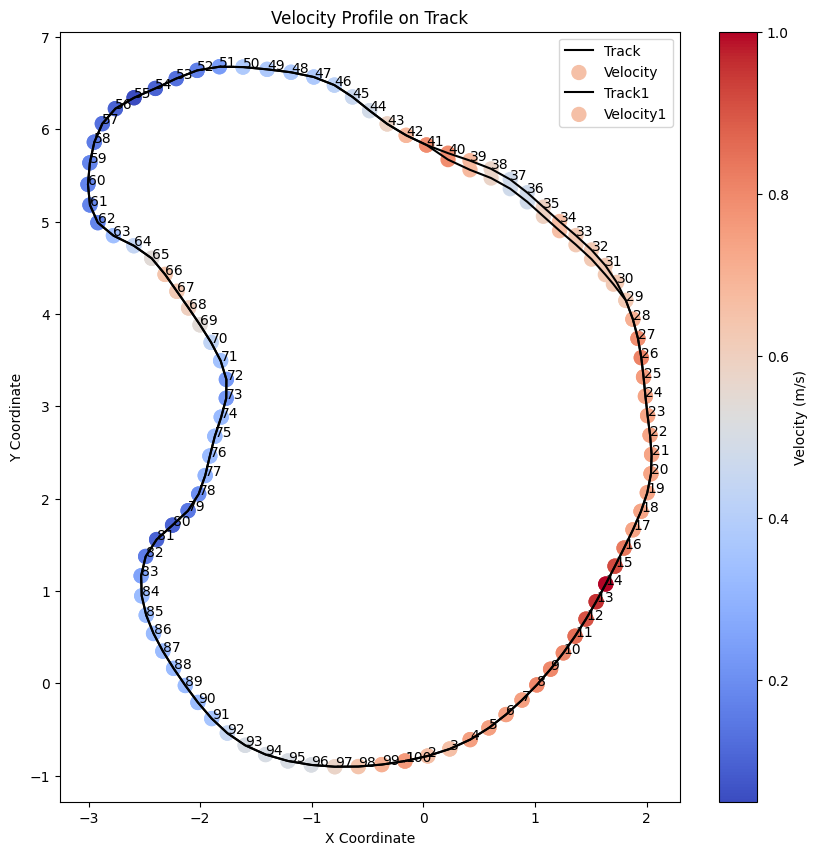

In [2]:
import matplotlib.pyplot as plt

df = pd.read_csv('combined.csv')
df1 = pd.read_csv('combined_copy_but_tuned.csv')

plt.figure(figsize=(10, 10))

plt.plot(df['x'], df['y'], 'k-', label='Track')
plt.scatter(df['x'], df['y'], c=df['v'], cmap='coolwarm', label='Velocity', s=100)

plt.plot(df1['x'], df1['y'], 'k-', label='Track1')
plt.scatter(df1['x'], df1['y'], c=df1['v'], cmap='coolwarm', label='Velocity1', s=100)
for i in range(len(df)):
    plt.annotate(i + 1, (df['x'][i], df['y'][i]))
plt.colorbar(label='Velocity (m/s)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Velocity Profile on Track')
plt.legend()

plt.savefig('vel.png')
plt.show()

In [3]:
import math

df1 = pd.read_csv('smoothed_inside_line.csv')
df2 = pd.read_csv('smoothed_outside_line.csv')

inside = list(df1.to_records(index=False))
outside = list(df2.to_records(index=False))

def dist_at_angle(angle):
    return 5

def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def is_part_of_track(inside, outside, x, y, theta):
    error = 1e-2

    d = dist_at_angle(theta)

    observed_point = (d * math.cos(theta) + x, d * math.sin(theta) + y)

    for point in inside + outside:
        if dist(point, observed_point) <= error:
            return False
        
    return True

is_part_of_track(inside, outside, 0, 0, 50)

True